# TED Data Analysis

Deep exploratory data analysis for the TED dataset. 

Source: https://www.kaggle.com/rounakbanik/ted-data-analysis

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
# from wordcloud import WordCloud, STOPWORDS

In [2]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [3]:
# Inizialization
path_datasets = '/Users/stefanopozzati/Documents/GitHub/data_science/python_data_analysis/datasets/'
df = pd.read_csv(path_datasets + 'TED/ted_main.csv')
df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

**Features Available**

- name: The official name of the TED Talk. Includes the title and the speaker.

- title: The title of the talk

- description: A blurb of what the talk is about.

- main_speaker: The first named speaker of the talk.

- speaker_occupation: The occupation of the main speaker.

- num_speaker: The number of speakers in the talk.

- duration: The duration of the talk in seconds.

- event: The TED/TEDx event where the talk took place.

- film_date: The Unix timestamp of the filming.

- published_date: The Unix timestamp for the publication of the talk on TED.com

- comments: The number of first level comments made on the talk.

- tags: The themes associated with the talk.

- languages: The number of languages in which the talk is available.

- ratings: A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)

- related_talks: A list of dictionaries of recommended talks to watch next.

- url: The URL of the talk.

- views: The number of views on the talk.

In [4]:
df = df[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration', 'event', 'film_date', 'published_date', 'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']]

In [7]:
import datetime
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
name                  2550 non-null object
title                 2550 non-null object
description           2550 non-null object
main_speaker          2550 non-null object
speaker_occupation    2544 non-null object
num_speaker           2550 non-null int64
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null object
published_date        2550 non-null object
comments              2550 non-null int64
tags                  2550 non-null object
languages             2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(5), object(12)
memory usage: 338.8+ KB


In [9]:
df['name'].head(10)

0            Ken Robinson: Do schools kill creativity?
1                 Al Gore: Averting the climate crisis
2                        David Pogue: Simplicity sells
3                   Majora Carter: Greening the ghetto
4        Hans Rosling: The best stats you've ever seen
5                   Tony Robbins: Why we do what we do
6                     Julia Sweeney: Letting go of God
7    Joshua Prince-Ramus: Behind the design of Seat...
8    Dan Dennett: Let's teach religion -- all relig...
9                       Rick Warren: A life of purpose
Name: name, dtype: object

In [10]:
df.head(5)

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,25-02-2006,27-06-2006,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,24-02-2006,27-06-2006,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,26-02-2006,27-06-2006,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,22-02-2006,27-06-2006,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [15]:
len(df)

2550

In [11]:
# top 15 talks
pop_talks = df[['title', 'main_speaker', 'views', 'film_date']].sort_values('views', ascending=False)[:15]
pop_talks

,title,main_speaker,views,film_date
0,Do schools kill creativity?,Ken Robinson,47227110,25-02-2006
1346,Your body language may shape who you are,Amy Cuddy,43155405,26-06-2012
677,How great leaders inspire action,Simon Sinek,34309432,17-09-2009
837,The power of vulnerability,Brené Brown,31168150,06-06-2010
452,10 things you didn't know about orgasm,Mary Roach,22270883,06-02-2009
1776,How to speak so that people want to listen,Julian Treasure,21594632,10-06-2013
201,My stroke of insight,Jill Bolte Taylor,21190883,27-02-2008
5,Why we do what we do,Tony Robbins,20685401,02-02-2006
2114,This is what happens when you reply to spam email,James Veitch,20475972,08-12-2015
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,27-10-2012


In [15]:
pop_talks['main_speaker'].apply(lambda x: x.split(" ")[1][0]).head()

0       R
1346    C
677     S
837     B
452     R
Name: main_speaker, dtype: object

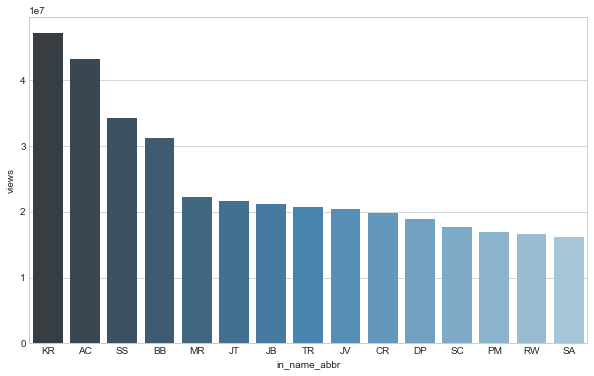

In [19]:
# visualization - barplot
pop_talks['in_name'] = pop_talks['main_speaker'].apply(lambda x: x.split(" ")[0][0])
pop_talks['in_surname'] = pop_talks['main_speaker'].apply(lambda x: x.split(" ")[1][0])
pop_talks['in_name_abbr'] = pop_talks['in_name'] + pop_talks['in_surname']
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='in_name_abbr', y='views', data=pop_talks, palette="Blues_d")

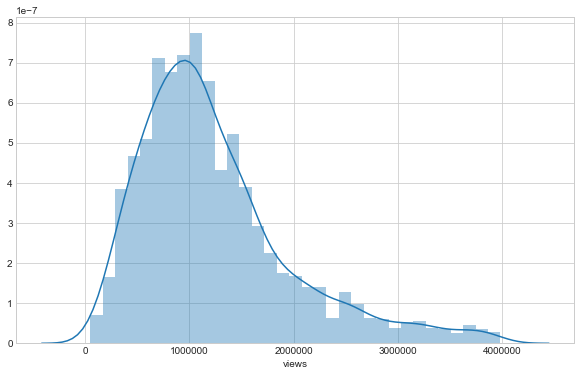

In [22]:
# visualization - density
plt.figure(figsize=(10,6))
sns.distplot(df[df['views'] < 0.4e7]['views'])

In [26]:
# description and more percentiles
df['views'].describe(percentiles = np.arange(0.1, 1, 0.1))

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
10%      4.842648e+05
20%      6.816952e+05
30.0%    8.341033e+05
40%      9.841314e+05
50%      1.124524e+06
60%      1.306448e+06
70%      1.538273e+06
80%      1.971571e+06
90%      3.051913e+06
max      4.722711e+07
Name: views, dtype: float64

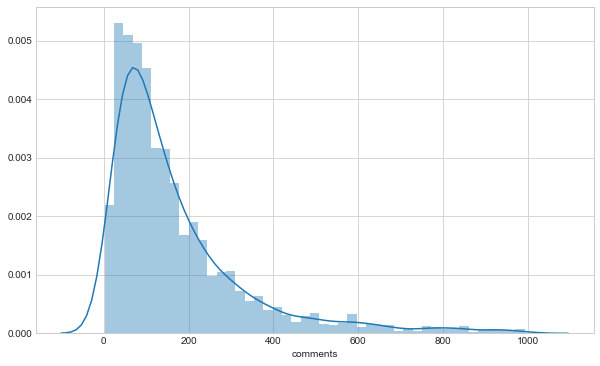

In [31]:
# visualization - density
plt.figure(figsize = (10,6))
sns.distplot(df[df['comments'] < 1000]['comments'])

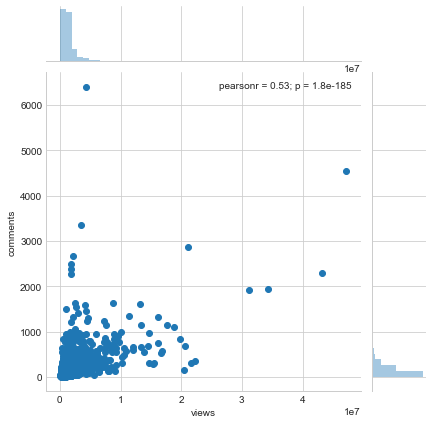

In [68]:
# visualization - combined density
plt.figure(figsize = (12,6))
sns.jointplot(x='views', y='comments', data=df)

In [35]:
# check correlation
df[['views', 'comments']].corr()

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


In [36]:
df[['title', 'main_speaker','views', 'comments']].sort_values('comments', ascending=False).head(10)

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


In [37]:
# discussion coefficient
df['dis_quo'] = df['comments']/df['views']
df[['title', 'main_speaker','views', 'comments', 'dis_quo', 'film_date']].sort_values('dis_quo', ascending=False).head(10)

,title,main_speaker,views,comments,dis_quo,film_date
744,The case for same-sex marriage,Diane J. Savino,292395,649,0.002220,02-12-2009
803,E-voting without fraud,David Bismark,543551,834,0.001534,14-07-2010
96,Militant atheism,Richard Dawkins,4374792,6404,0.001464,02-02-2002
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,1057238,1502,0.001421,10-02-2010
954,Taking imagination seriously,Janet Echelman,1832930,2492,0.001360,03-03-2011
840,On reading the Koran,Lesley Hazleton,1847256,2374,0.001285,10-10-2010
876,Curating humanity's heritage,Elizabeth Lindsey,439180,555,0.001264,08-12-2010
1787,How do you explain consciousness?,David Chalmers,2162764,2673,0.001236,18-03-2014
661,The danger of science denial,Michael Specter,1838628,2272,0.001236,11-02-2010
561,Dance to change the world,Mallika Sarabhai,481834,595,0.001235,04-11-2009


In [38]:
# Time series analysis
df['month'] = df['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])

month_df = pd.DataFrame(df['month'].value_counts()).reset_index()
month_df.columns = ['month', 'talks']

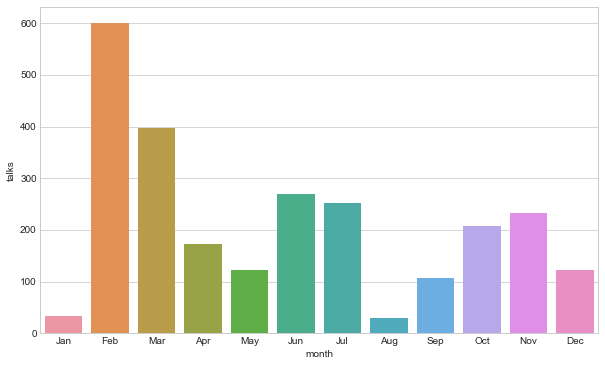

In [39]:
plt.figure(figsize = (10, 6))
sns.barplot(x='month', y='talks', data=month_df, order=month_order)
plt.title('Distribution over months TED')

In [40]:
df_x = df[df['event'].str.contains('TEDx')]
x_month_df = pd.DataFrame(df_x['month'].value_counts().reset_index())
x_month_df.columns = ['month', 'talks']

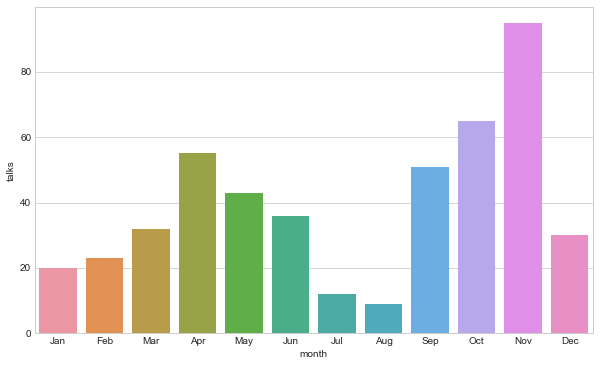

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(x='month', y='talks', data=x_month_df, order=month_order)
plt.title('Distribution over months TEDx')

In [42]:
# extract days
def getday(x):
    day, month, year = (int(i) for i in x.split('-'))    
    answer = datetime.date(year, month, day).weekday()
    return day_order[answer]

In [60]:
df['day'] = df['film_date'].apply(getday)

In [61]:
day_df = pd.DataFrame(df['day'].value_counts()).reset_index()
day_df.columns = ['day', 'talks']

Text(0.5,1,'Distribution over week days')

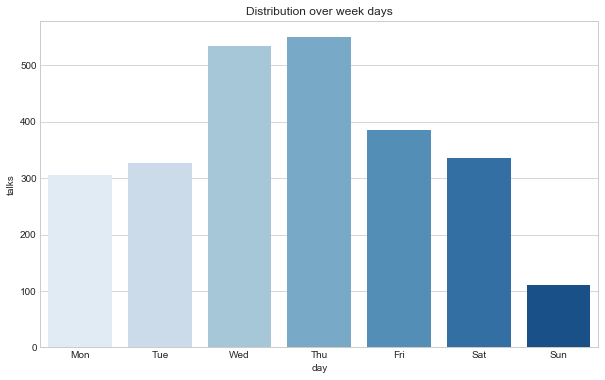

In [66]:
plt.figure(figsize=(10,6))
sns.barplot(x='day', y='talks', data=day_df, order=day_order, palette='Blues')
plt.title('Distribution over week days')

In [69]:
df['year'] = df['film_date'].apply(lambda x: x.split('-')[2])
year_df = pd.DataFrame(df['year'].value_counts().reset_index())
year_df.columns = ['year', 'talks']

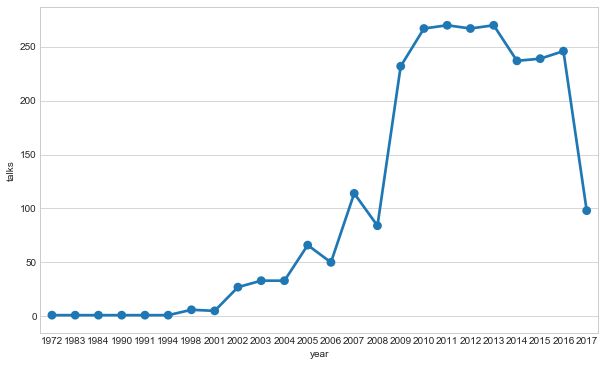

In [70]:
plt.figure(figsize=(10,6))
sns.pointplot(x='year', y='talks', data=year_df)

In [71]:
# create heatmap
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

In [125]:
hmap_df = df.copy()
hmap_df['film_date'] = hmap_df['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1] + " " + str(x.split('-')[2]))
hmap_df = pd.pivot_table(hmap_df[['film_date', 'title']], index='film_date', aggfunc='count').reset_index()
hmap_df['month_num'] = hmap_df['film_date'].apply(lambda x: months[x.split()[0]])
hmap_df['year'] = hmap_df['film_date'].apply(lambda x: x.split()[1])
hmap_df = hmap_df.sort_values(['year', 'month_num'])
hmap_df = hmap_df[['month_num', 'year', 'title']]
hmap_df = hmap_df.pivot('month_num', 'year', 'title')
hmap_df = hmap_df.fillna(0)

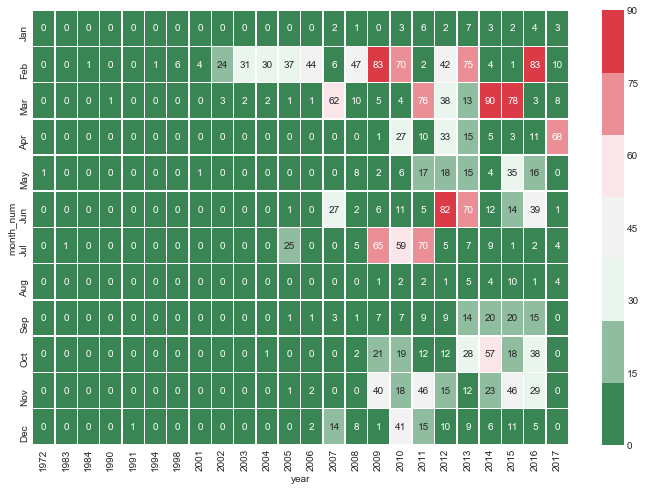

In [126]:
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(hmap_df, annot=True, linewidths=.5, 
            ax=ax, fmt='n', yticklabels=month_order, 
            cmap= sns.diverging_palette(138, 10, center = "light", sep=80, n=7))

In [128]:
# selecting top contributors
speaker_df = df.groupby('main_speaker').count().reset_index()[['main_speaker', 'comments']]
speaker_df.columns = ['main_speaker', 'appearances']
speaker_df = speaker_df.sort_values('appearances', ascending=False)
speaker_df.head(15)

,main_speaker,appearances
770,Hans Rosling,9
1066,Juan Enriquez,7
1693,Rives,6
1278,Marco Tempest,6
397,Clay Shirky,5
1487,Nicholas Negroponte,5
1075,Julian Treasure,5
424,Dan Ariely,5
850,Jacqueline Novogratz,5
248,Bill Gates,5


In [133]:
occupation_df = df.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
occupation_df.columns = ['occupation', 'appearances']
occupation_df = occupation_df.sort_values('appearances', ascending=False)

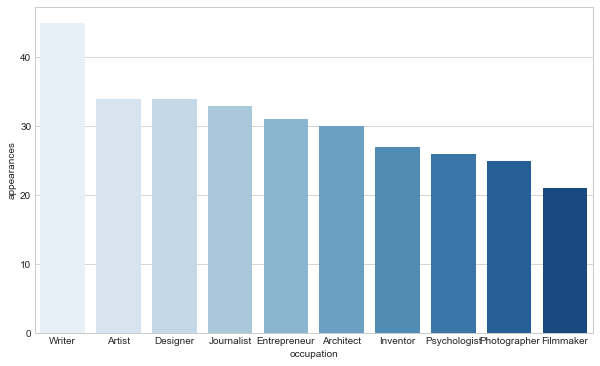

In [137]:
plt.figure(figsize=(10,6))
sns.barplot(x='occupation', y='appearances', data=occupation_df.head(10), palette="Blues")
plt.show()

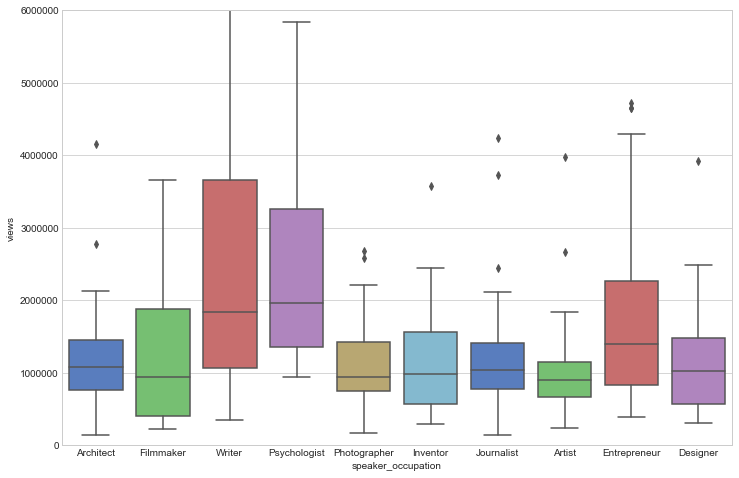

In [141]:
# visualization - boxplot
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12, 8))
sns.boxplot(x='speaker_occupation', y='views', 
            data=df[df['speaker_occupation'].isin(occupation_df.head(10)['occupation'])], 
            palette="muted", ax =ax)
ax.set_ylim([0, 0.6e7])
plt.show()

In [145]:
# Most uploads
events_df = df[['title', 'event']].groupby('event').count().reset_index()
events_df.columns = ['event', 'talks']
events_df = events_df.sort_values('talks', ascending=False)
events_df.head(10)

,event,talks
64,TED2014,84
59,TED2009,83
63,TED2013,77
66,TED2016,77
65,TED2015,75
99,TEDGlobal 2012,70
61,TED2011,70
60,TED2010,68
98,TEDGlobal 2011,68
57,TED2007,68


In [147]:
import ast
df['related_talks'] = df['related_talks'].apply(lambda x: ast.literal_eval(x))

In [148]:
s = df.apply(lambda x: pd.Series(x['related_talks']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'related'

In [149]:
related_df = df.drop('related_talks', axis=1).join(s)
related_df['related'] = related_df['related'].apply(lambda x: x['title'])

In [150]:
d = dict(related_df['title'].drop_duplicates())
d = {v: k for k, v in d.items()}

In [151]:
related_df['title'] = related_df['title'].apply(lambda x: d[x])
related_df['related'] = related_df['related'].apply(lambda x: d[x])

In [152]:
related_df = related_df[['title', 'related']]
related_df.head()

,title,related
0,0,692
0,0,1502
0,0,1991
0,0,715
0,0,1023


In [153]:
edges = list(zip(related_df['title'], related_df['related']))

In [154]:
import networkx as nx
G = nx.Graph()
G.add_edges_from(edges)

ModuleNotFoundError: No module named 'networkx'

In [ ]:
plt.figure(figsize=(25, 25))
nx.draw(G, with_labels=False)